# Tutorial 0 - setting up the galaxy sample
This version of SIGAME comes with a set of 3 test galaxies from the Simba cosmological 25Mpc/h volume. Here we try to load SIGAME and generate the **Globale Results file** that will contain all future results. We also talk about how to set up your own galaxy sample at the end.

## BEFORE importing SIGAME
It's important that you create a `parameters.txt` file which will tell SIGAME what to do. Included in the release you will find a file camed `parameters_template.txt`. Make a copy of this file and name the copy `parameters.txt`. This file is already set up to run with the supplied Simba galaxies, but this is where you would make edits to adapt SIGAME for a different simulation.

## Importing SIGAME
First of all, **make sure you are located in the main SIGAME/ folder** when running this notebook or importing SIGAME in general. The first time you import sigame, it might crash because of missing modules that you will have to install, OR because it couldn't find the above mentioned `parameters.txt` file (make sure that your copy of this file is located in the main SIGAME/ folder). At the end, you should get the following print out:

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sigame as si


     
     .oOOOo.  ooOoOOo  .oOOOo.     Oo    Oo      oO o.OOoOoo  
     o     o     O    .O     o    o  O   O O    o o  O        
     O.          o    o          O    o  o  o  O  O  o        
      `OOoo.     O    O         oOooOoOo O   Oo   O  ooOO     
           `O    o    O   .oOOo o      O O        o  O        
            o    O    o.      O O      o o        O  o        
     O.    .O    O     O.    oO o      O o        O  O        
      `oooO'  ooOOoOo   `OooO'  O.     O O        o ooOooOoO  
     
      SImulator of GAlaxy Millimeter/submillimeter Emission
---- A code to simulate the far-IR emission lines of the ISM  ----
------------- in galaxies from hydrodynamical codes --------------
----- for the interpretation and prediction of observations. -----
- Contact: Karen Olsen, karenolsen (at) email.arizona.edu (2021) -


Reading parameter file: [/home/karen/projects/SIGAME/SIGAME/parameters.txt] ... 
will look for skirt input/output data in /home/karen/projects/SIGAME/SIG

**OBS:** We are not actually going to run SIGAME in this tutorial, so you can ignore the task mentioned above `Read SKIRT output` - that's for Tutorial 1!

### Galaxy sample
For SIGAME to run, it needs specific information about each galaxy and a file that describes the galaxy sample to be used. One way to check that a sample is ready to use, is by using the print_results() command:

In [2]:
si.print_results()

Filename in global_results._get_file(): 
/home/karen/projects/SIGAME/SIGAME/data/results/z0_3gals_simba_25Mpc_arepoPDF

 BASIC GALAXY INFO
+------------------------------------------------------------------------------------------------+
|      Name     |       z       | Mstar (caesar)|      SFR      |       R       |    Lum dist   |
|               |               |  [10^10 Msun] |   [Msun/yr]   |     [kpc]     |     [Mpc]     |
+------------------------------------------------------------------------------------------------+
|       G0      |           0.00|       2.27e+00|           5.86|         101.93|          10.22|
|       G1      |           0.00|       3.75e+00|           5.60|          47.11|          18.33|
|       G2      |           0.00|       1.33e+01|           1.42|         169.82|          15.47|
+------------------------------------------------------------------------------------------------+

 ISM PROPERTIES
+--------------------------------------------------------

**OBS::** Depending on your galaxy sample, here you might receive a msg saying to **"Stop and update parameter.txt to reflect new nGal"**. This is because SIGAME has recalculated the SFR of each galaxy by only including stars with ages < 100 Myr, and found that some galaxies have SFR = 0. These galaxies have been taken out of the sample and parameter.txt must now be edited to that nGal equals the new samples size. 

If all went well, the command should have generated a **"Global Results"** file that will contain all integrated results from SIGAME. You can look for this file in the data/results/ folder. The command also prints some basic galaxy info that is already available, like redshift, stellar mass, SFR, galaxy radius and luminosity distance.

As you can see, the code is already reporting line emission. This is because the data supplied for the three test galaxies already contains line intensities per cell. This was done, so that the user can run all tutorials whether or not they have enough computing power to execute every step fully. If you DO want to re-run each step, change the overwrite parameter `ow` in parameters.txt from `no` to `yes`.

### &#9654; Congratulations ! You are successfully set up to use SIGAME&#9664;

## Plots!
With the galaxy sample set up, we can make some simple plots to visualize the simulation data. In all examples below, the user set the keyword argument `savefig` to **True** to automatically save the figure created.

[2.26518989e+10 3.75316266e+10 1.32872802e+11]
[5.8560877  5.60400275 1.420697  ]
[0.64655987 2.93764294]


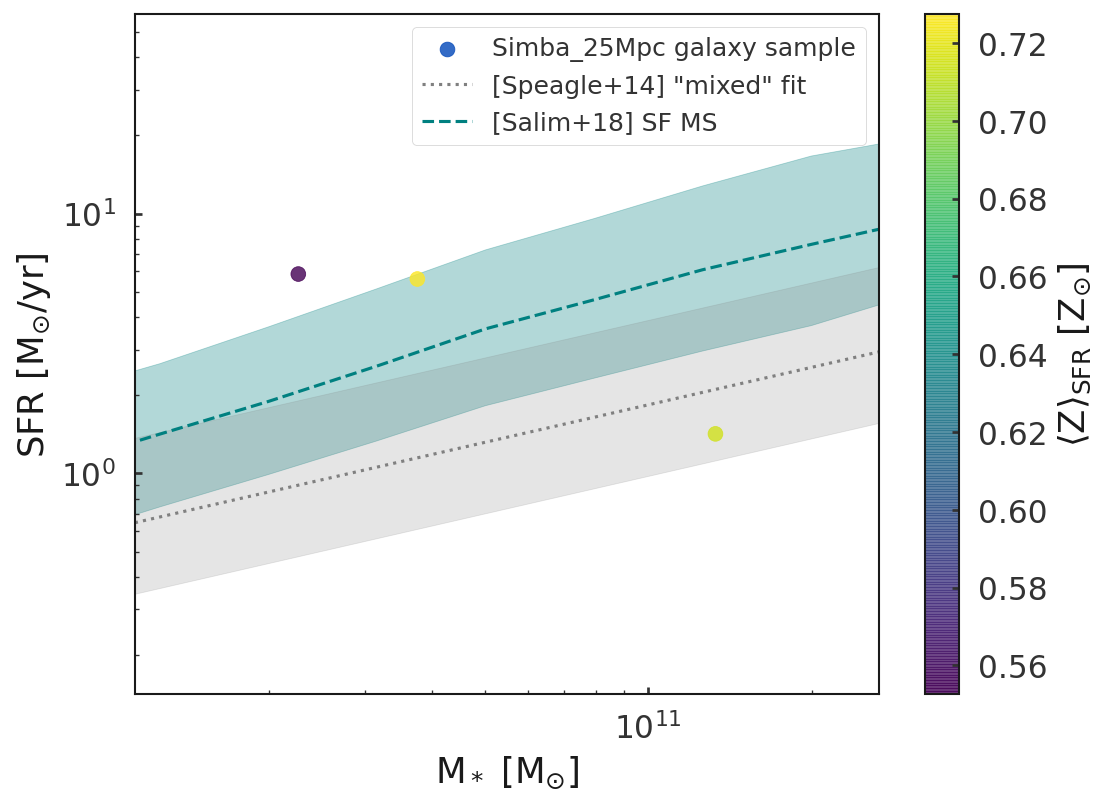

In [3]:
### How to show the galaxies on a main sequence (MS) plot ###
# If z1 in the parameters.txt is set to 0, then local MS relations will be shown for comparison.
si.plot.Main_Sequence(savefig=False)

Range in stellar age [Myr]:  1.2110720645832629 11994.833003854366
11.994833003854366


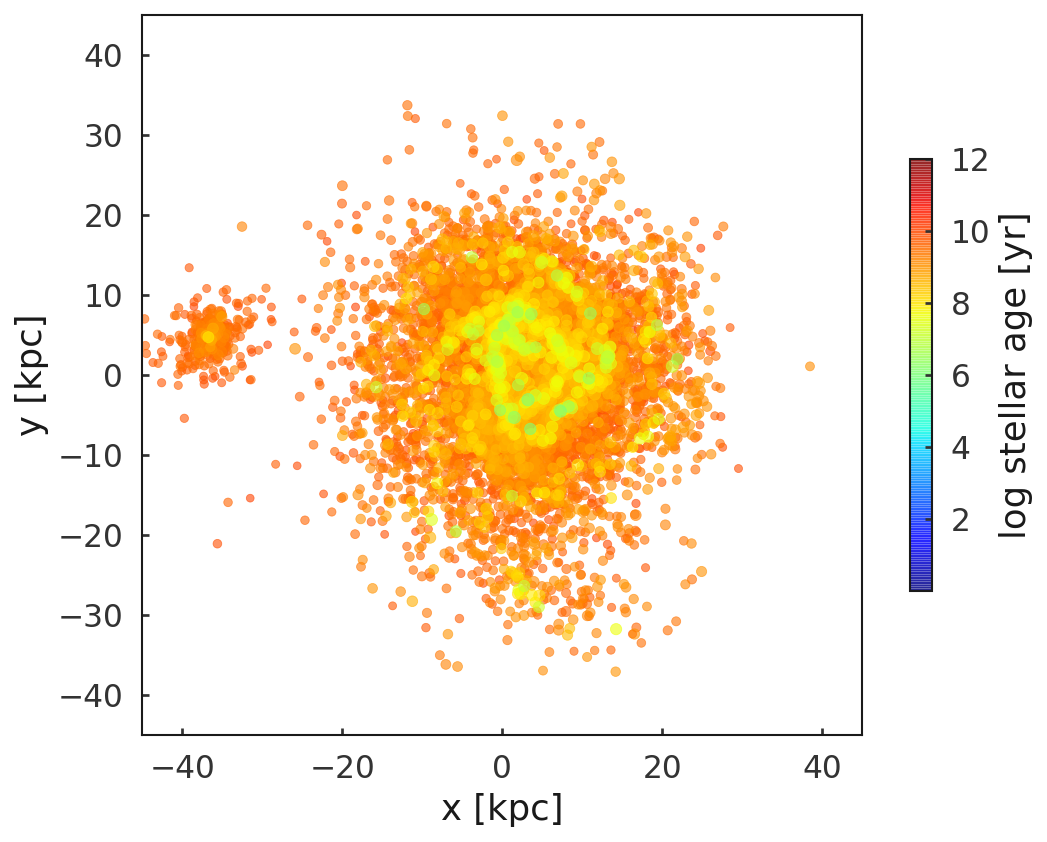

In [4]:
### How to show the position of stellar particles within a galaxy ###
# Stellar particles are shown as dots colored by their age 
# and sizes of each dot scale with stellar mass
si.plot.star_map(gal_index=0, R_max=45, vmax=12, savefig=False)

Scaling gas positions by: 93.02


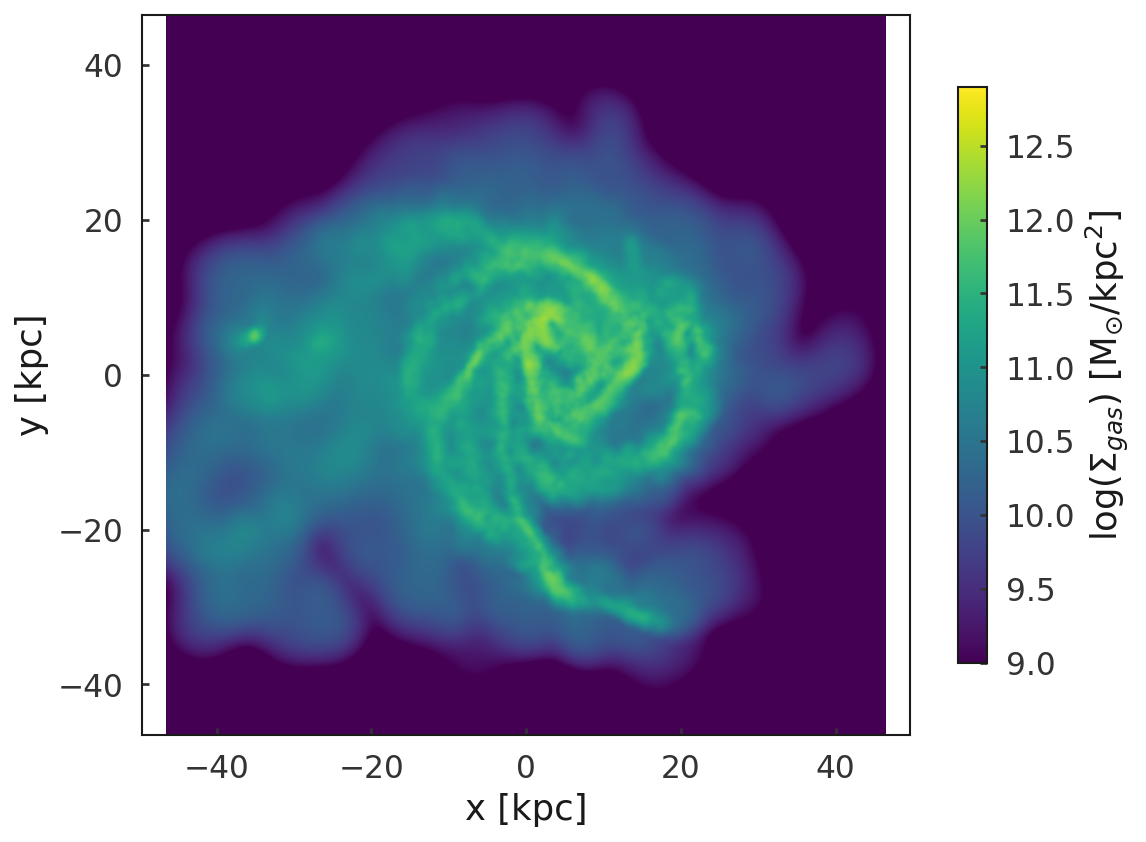

In [5]:
### How to make surface density map of gas within a galaxy ###
# The keyword "prop" can be the name of any column in the stored simgas file.
si.plot.map_sim_property(gal_index=0,prop='m',sim_type='simgas',\
         vmin=9,vmax=12.9,pix_size_kpc=0.5,savefig=False)

---
## Notes on how to generate your own galaxy sample
With any galaxy sample, a **Galaxy Selection** file must be created as a pandas dataframe with just one column named 'gal_num' which is the Galaxy ID number in the simulation. The dataframe can contain more columns, but only gal_num will be used to locate the raw galaxy data file.

The dataframe must be saved with pickle and have a filename like this:

### " z\<redshift\>_galsample_\<nGal\>_\<sim_name\>_\<sim_run\> "
    
where \<redshift\> is the redshift for the sample (same as z1 in parameters.txt), \<nGal\> is the number of galaxies in the sample (same as nGal in parameters.txt), \<sim_name\> is the name of the simulation (same as sim_name in parameters.txt) and <sim_name> is the name of the specific simulation run used (same as sim_run in parameters.txt and optional). In this case:

### z0_galsample_3_simba_25Mpc

---

The raw galaxy data files must be saved as pandas dataframes in data/particle_data/sim_data/ with names like this:

### " z\<redshift\>_\<gal_num\>_\<sim_name\>_\<sim_run\> "

where \<redshift\> is the redshift for the specific galaxy (now with 2 decimal precision), \<gal_num\> is the Galaxy ID number in the simulation, \<sim_name\> is the name of the simulation (same as sim_name in parameters.txt) and <sim_name> is the name of the specific simulation run used (same as sim_run in parameters.txt and optional). 

The ending of the filename has to reflect whether the data is gas or stars by ending the filename in ".rawsimgas" or ".rawsimstar". In this case, the gas and star particle files are called for instance:

### z0.00_15_simba_25Mpc.rawsimgas and z0.00_15_simba_25Mpc.rawsimstar

Each gas particle file must contain the following columns:<br>
'x', 'y', 'z', 'vx', 'vy', 'vz', 'm', 'nH', 'h', 'SFR', 'Z', 'f_H2', 'm_dust', 'Z_dust', 'a_He', 'a_C', 'a_N', 'a_O', 'a_Ne', 'a_Mg', 'a_Si', 'a_S', 'a_Ca','a_Fe',  'DTM'<br>
(where everything after 'Z' is actually optional)
       
Each star particle file must contain the following columns:<br>
'x', 'y', 'z', 'vx', 'vy', 'vz', 'm', 'age', 'Z'